In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with h5py.File("/media/dan/Data/git/network_miner/temp/data/064_000500_0000.5.hdf5", "r") as f:
    A_mats_001 = f['data']['A_mats'][2,1,:] 
    A_mats_001_mask = f['data']['A_mask'][:10000]
    full_A_mats_001_shape = f['data']['A_mats'].shape

In [7]:
with h5py.File("/media/dan/Data/git/network_miner/temp/data/064_000500_000050.hdf5", "r") as f:
    A_mats_050 = f['data']['A_mats'][:] 
    A_mats_050_mask = f['data']['A_mask'][:]
    soz = f['metadata']["patient_info"]['soz'][:].astype(bool)
    
with h5py.File("/media/dan/Data/git/network_miner/temp/data/064_000500_000250.hdf5", "r") as f:
    A_mats_250 = f['data']['A_mats'][:]
    A_mats_250_mask = f['data']['A_mask'][:]

with h5py.File("/media/dan/Data/git/eeg_prep/processed_files/064_000500_000500.hdf5", "r") as f:
    A_mats_500 = f['data']['A_mats'][:]
    A_mats_500_mask = f['data']['A_mask'][:]

In [5]:
A_mats_001.shape

(616065,)

<Axes: >

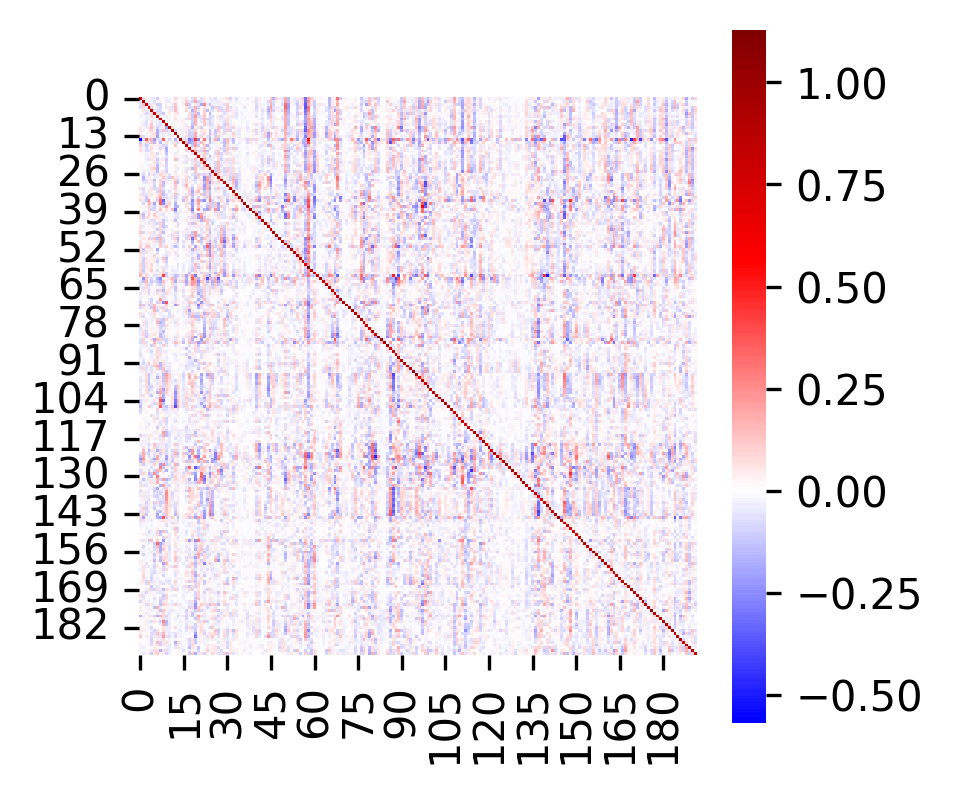

In [38]:
plt.figure(figsize=(3,3), dpi=300)
sns.heatmap(A_mats_500[:,:,1], cmap="seismic", center=0, square=True)

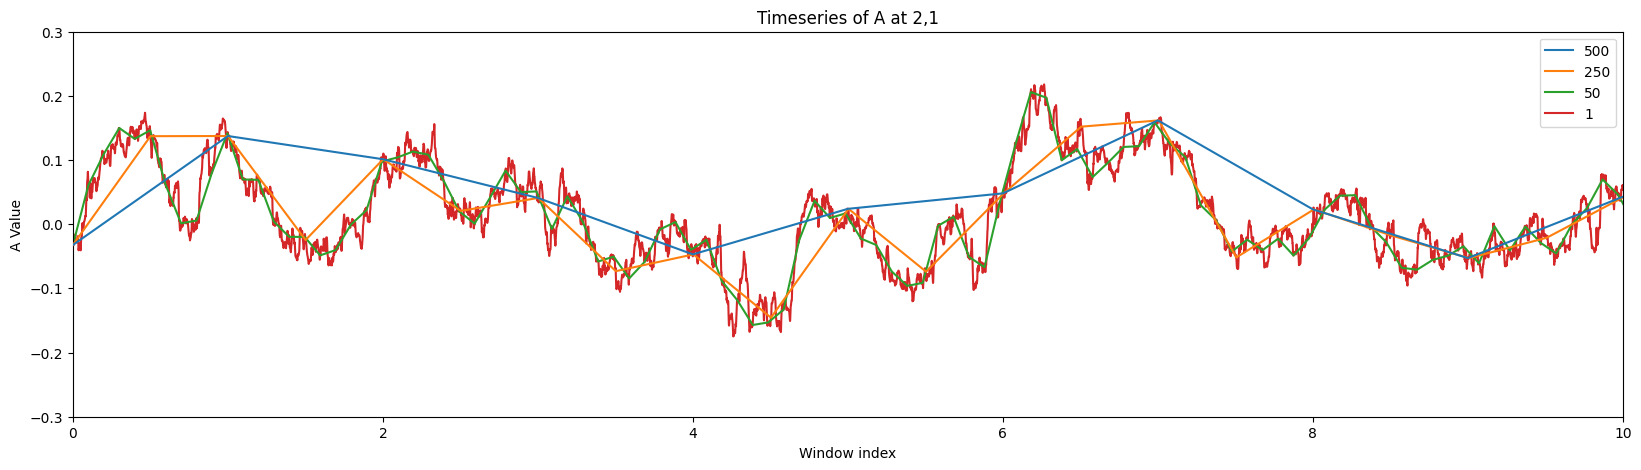

In [9]:
x_001 = np.linspace(0,A_mats_500.shape[2],full_A_mats_001_shape[-1])[:A_mats_001.shape[-1]]

x_050 = np.linspace(0,A_mats_500.shape[2],A_mats_050.shape[2])
x_250 = np.linspace(0,A_mats_500.shape[2],A_mats_250.shape[2])
x_500 = np.arange(0,A_mats_500.shape[2])

plt.figure(figsize=(20,5))
plt.plot(x_500,A_mats_500[2,1,:],label="500", zorder=4)
plt.plot(x_250,A_mats_250[2,1,:],label="250", zorder=3)
plt.plot(x_050,A_mats_050[2,1,:],label="50", zorder=2)
plt.plot(x_001,A_mats_001[:],label="1", zorder=1)
# plt.axhline(np.mean(A_mats_500[2,1,A_mats_500_mask]),c="b",linestyle="--")

plt.xlim(0,10)
plt.ylim(-.3,.3)
plt.legend()
plt.xlabel("Window index")
plt.ylabel("A Value")
plt.title("Timeseries of A at 2,1")
plt.show()


In [11]:

import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def recurrence_plot(data, percent_ones=0.05):
    """
    Generate a recurrence plot from a time series, setting the threshold to ensure a certain percentage of ones.

    :param data: Time series data
    :param percent_ones: Proportion of ones in the output matrix (between 0 and 1)
    :return: Recurrence plot
    """
    # Calculate the distance matrix
    data = np.array(data).reshape(-1, 1)
    distance_matrix = np.abs(data - data.T)

    # Flatten and sort distances to find the threshold
    flattened_distances = distance_matrix.flatten()
    sorted_distances = np.sort(flattened_distances)
    
    # Find the cutoff distance corresponding to the desired percentage of ones
    cutoff_index = int(percent_ones * len(sorted_distances))
    threshold = sorted_distances[cutoff_index]

    # Create the recurrence plot based on the calculated threshold
    recurrence_plot = np.where(distance_matrix <= threshold, 1, 0)

    return recurrence_plot


In [12]:
A_mats_050.shape

(192, 192, 6040)

Text(0.5, 1.0, 'One-Sided Power Spectrum (Excluding DC)')

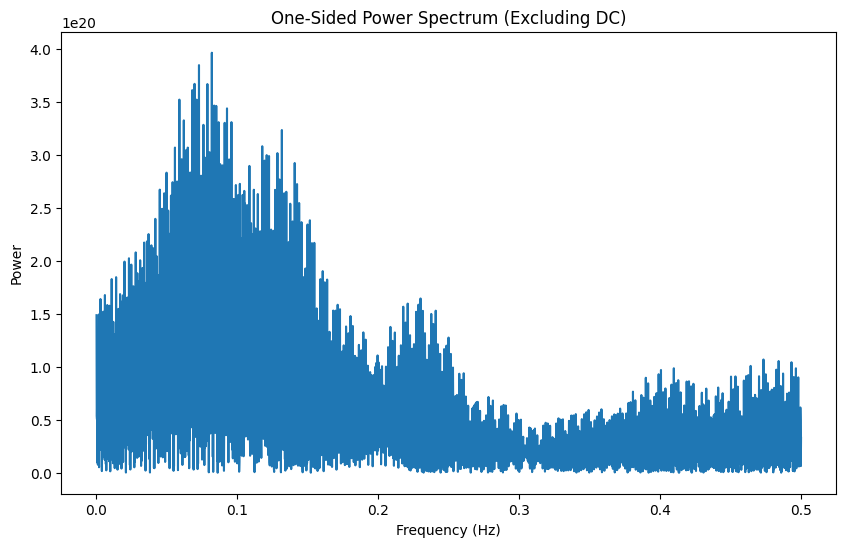

In [33]:
# Perform FFT
fft_values = np.fft.fft(A_mats_050[2,1,:])

# Compute power (magnitude squared of FFT values)
power = np.abs(fft_values)**2

# Define frequency axis
freqs = np.fft.fftfreq(len(A_mats_050[2,1,:]), d=1.0)  # d is the sampling interval; adjust if different

# Take only the positive frequencies (one-sided)
half_n = len(freqs) // 2
freqs = freqs[1:half_n]    # Start from 1 to exclude the DC component
power = power[1:half_n]

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs, power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("One-Sided Power Spectrum (Excluding DC)")
# plt.xlim(0,.5)

In [37]:
tick_positions = [idx for idx, value in enumerate(soz) if value]
tick_positions

[62, 63, 64, 83, 84, 85]

Text(0.5, 1.0, 'One-Sided Power Spectrum (Excluding DC)')

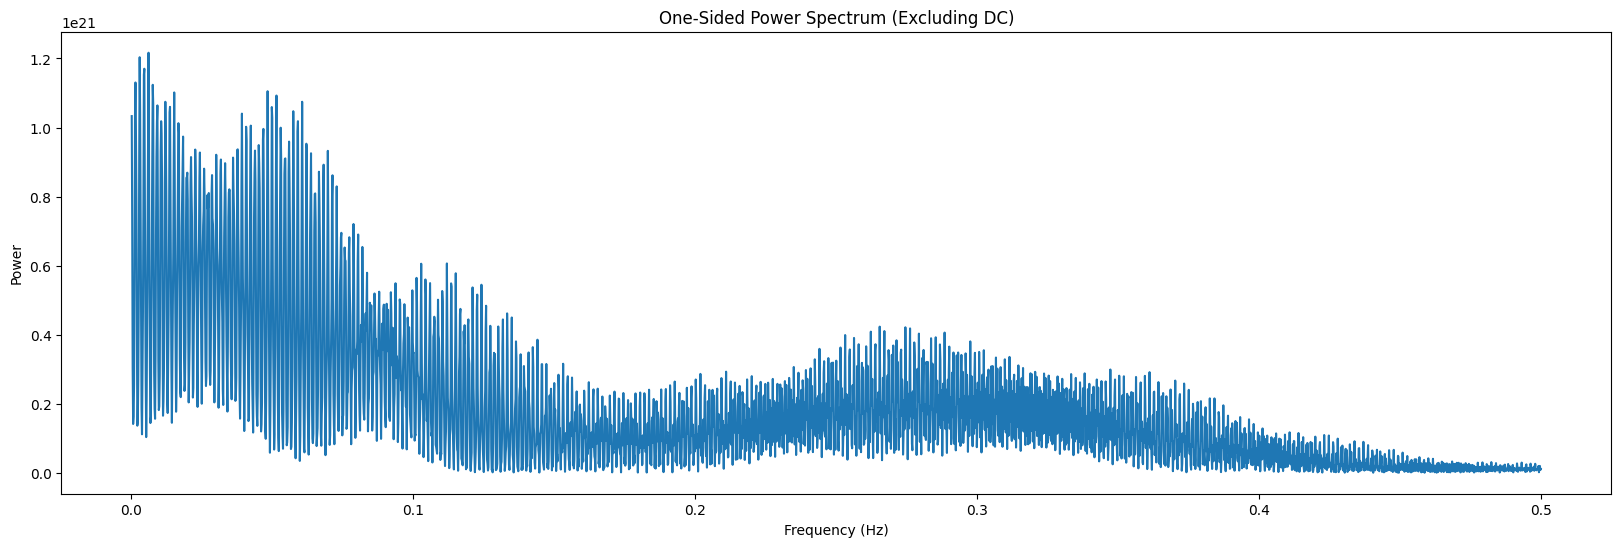

In [38]:
# Perform FFT
fft_values = np.fft.fft(A_mats_050[63,64,:])

# Compute power (magnitude squared of FFT values)
power = np.abs(fft_values)**2

# Define frequency axis
freqs = np.fft.fftfreq(len(A_mats_050[2,1,:]), d=1.0)  # d is the sampling interval; adjust if different

# Take only the positive frequencies (one-sided)
half_n = len(freqs) // 2
freqs = freqs[1:half_n]    # Start from 1 to exclude the DC component
power = power[1:half_n]

# Plot power spectrum
plt.figure(figsize=(20, 6))
plt.plot(freqs, power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("One-Sided Power Spectrum (Excluding DC)")
# plt.xlim(0,.5)

(0.0, 100.0)

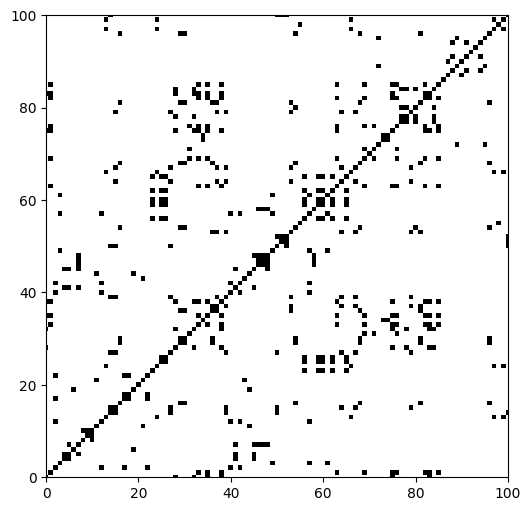

In [20]:
i = 2
j = 1
rec = recurrence_plot(A_mats_001[::50], 0.05)
plt.figure(figsize=(6,6))
plt.imshow(rec, cmap='binary', origin='lower')
plt.xlim(0,100)
plt.ylim(0,100)


In [42]:
s = soz
diffs = np.diff(A_mats_001, axis=-1)
diffs = np.abs(diffs)
magnitude = np.sum(diffs, axis=-1)


In [43]:
def split_by_soz(data, soz):
    s = soz
    if data.ndim == 3:
        # 3D array handling
        soz_soz = data[s, :, :][:, s, :]
        soz_noz = data[s, :, :][:, ~s, :]
        noz_soz = data[~s, :, :][:, s, :]
        noz_noz = data[~s, :, :][:, ~s, :]
    elif data.ndim == 2:
        # 2D array handling
        soz_soz = data[s, :][:, s]
        soz_noz = data[s, :][:, ~s]
        noz_soz = data[~s, :][:, s]
        noz_noz = data[~s, :][:, ~s]
    else:
        raise ValueError("Data should be a 2D or 3D array.")
    
    return soz_soz, soz_noz, noz_soz, noz_noz

In [44]:
soz_soz, soz_noz, noz_soz, noz_noz = split_by_soz(diffs, soz)

In [45]:
s_n = np.log(np.concatenate((soz_noz.flatten(), noz_soz.flatten())).flatten())
s_s = np.log(soz_soz.flatten())
n_n = np.log(noz_noz.flatten())

In [46]:
min_val = np.min([np.min(s_n), np.min(s_s), np.min(n_n)])
max_val = np.max([np.max(s_n), np.max(s_s), np.max(n_n)])

In [47]:
from fast_histogram import histogram1d

In [48]:
s_n_hist = histogram1d(s_n, bins=100, range=(min_val, max_val))
s_s_hist = histogram1d(s_s, bins=100, range=(min_val, max_val))
n_n_hist = histogram1d(n_n, bins=100, range=(min_val, max_val))

Text(0.5, 1.0, 'Noz-Noz')

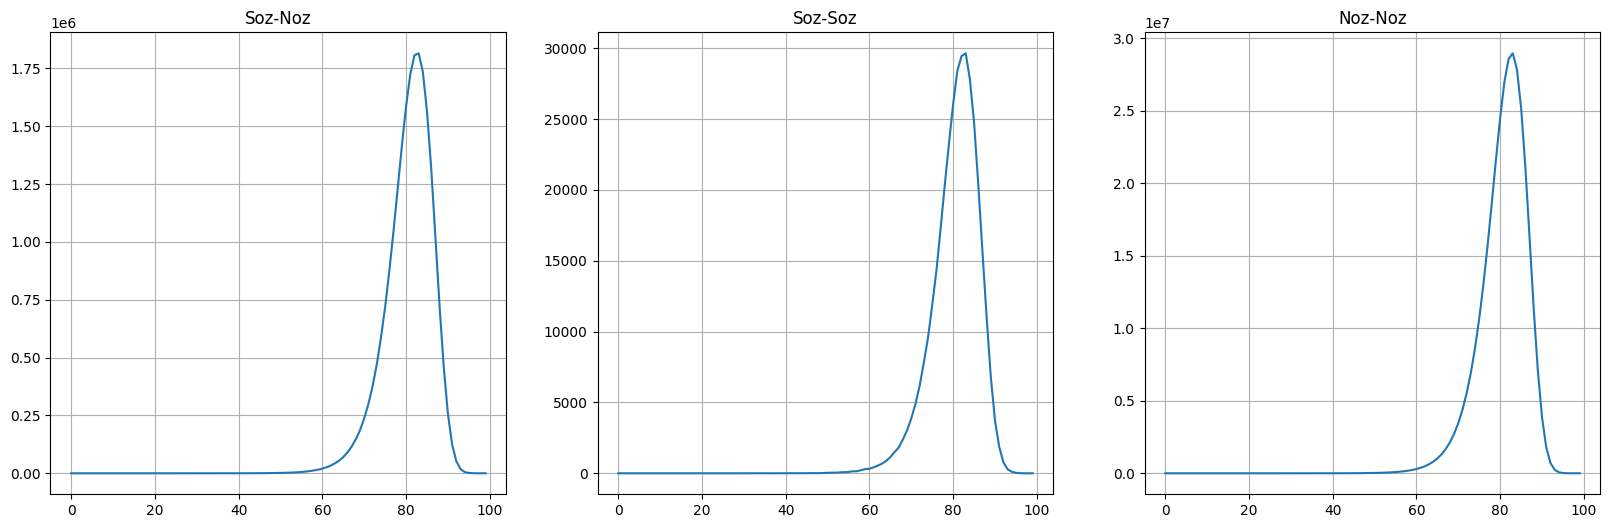

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharex=True)
ax[0].plot(s_n_hist)
ax[0].grid()
ax[0].set_title("Soz-Noz")
ax[1].plot(s_s_hist)
ax[1].grid()
ax[1].set_title("Soz-Soz")
ax[2].plot(n_n_hist)
ax[2].grid()
ax[2].set_title("Noz-Noz")


In [50]:
soz_soz, soz_noz, noz_soz, noz_noz = split_by_soz(magnitude, soz)

(5.0, 45.0)

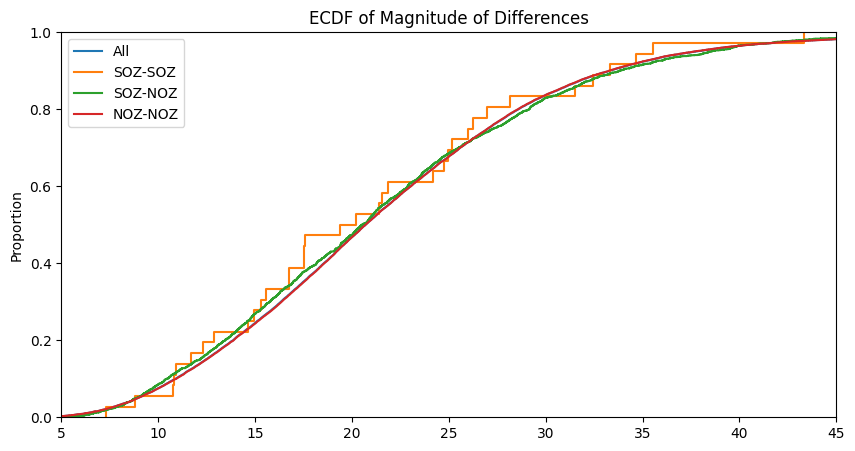

In [51]:
# do a sns.ecdfplot of the magnitude of the differences
plt.figure(figsize=(10,5))
sns.ecdfplot(magnitude.flatten(), label="All")
sns.ecdfplot(soz_soz.flatten(), label="SOZ-SOZ")
sns.ecdfplot(np.concatenate((soz_noz.flatten(), noz_soz.flatten())).flatten(), label="SOZ-NOZ")
sns.ecdfplot(noz_noz.flatten(), label="NOZ-NOZ")
plt.legend()
plt.title("ECDF of Magnitude of Differences")
plt.xlim(5,45)

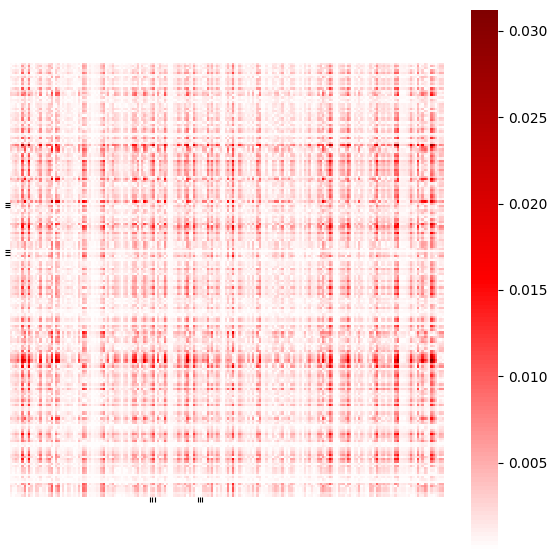

In [52]:
tick_positions = [idx for idx, value in enumerate(soz) if value]
a = diffs[...,1]
# a = np.mean(a,axis=-1)

plt.figure(figsize=(7,7))
ax = sns.heatmap(a, cmap="seismic",center=0,square=True)
# Remove all ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([]);

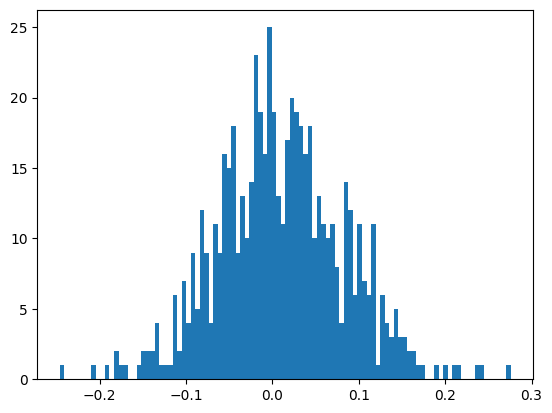

In [53]:
plt.hist(A_mats_500[2,1,A_mats_500_mask], bins=100);

In [54]:
plt.hist(average_A.flatten(),bins=1000);
plt.ylim(0,100)


NameError: name 'average_A' is not defined

<Axes: >

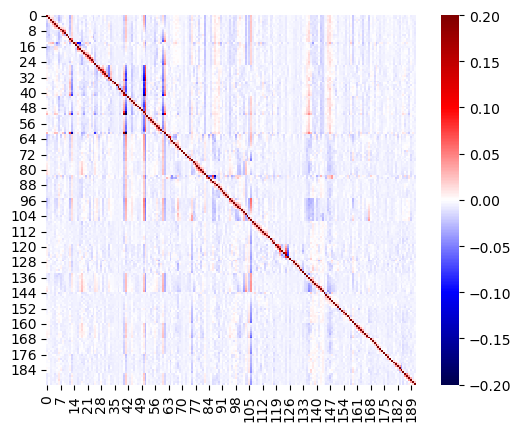

In [72]:
a = A_mats_500[:,:,A_mats_500_mask==1]
average_A = np.mean(a,axis=-1)
sns.heatmap(average_A, cmap="seismic",center=0,square=True,vmax=.2,vmin=-.2)


<Axes: >

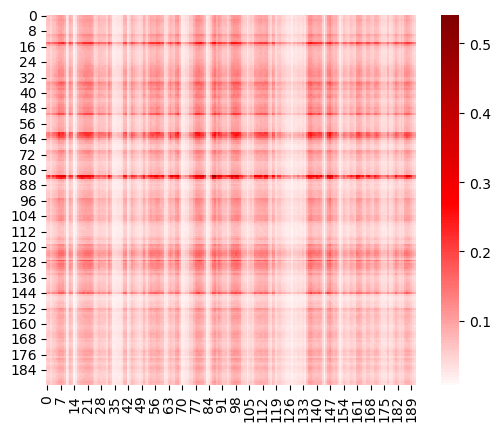

In [70]:
a = A_mats_500[:,:,A_mats_500_mask==1]
average_A = np.std(a,axis=-1)
sns.heatmap(average_A, cmap="seismic",center=0,square=True)


Dot

In [6]:
dots = []
masked = A_mats_050[:,:,A_mats_050_mask==1]
for x in range(masked.shape[-1]):
    temp = []   
    for i in range(masked.shape[0]):
        temp.append(np.dot(masked[i,:,x],masked[:,i,x]))
    dots.append(temp)

dots = np.array(dots)



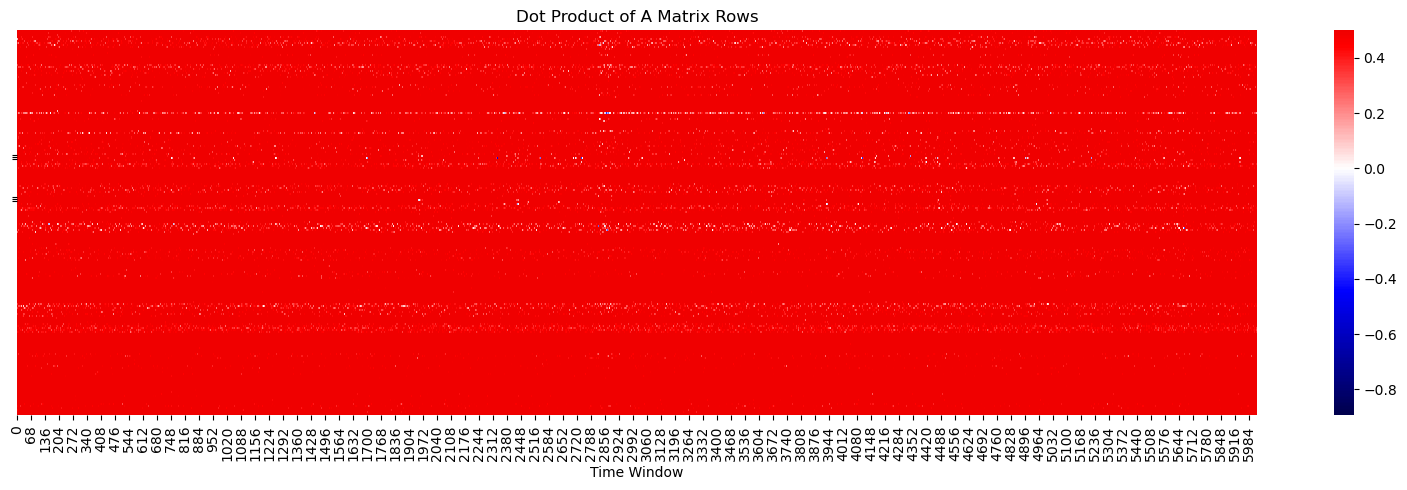

In [7]:
plt.figure(figsize=(20,5))
sns.heatmap(dots.T, cmap="seismic",center=0, vmax=.5)

# Remove y-axis ticks and labels completely
plt.yticks([])
plt.ylabel("")

# Add markers for SOZ channels without labels
soz_indices = np.where(soz)[0]
plt.yticks(soz_indices, [""] * len(soz_indices))

plt.title("Dot Product of A Matrix Rows")
plt.xlabel("Time Window")

plt.show()

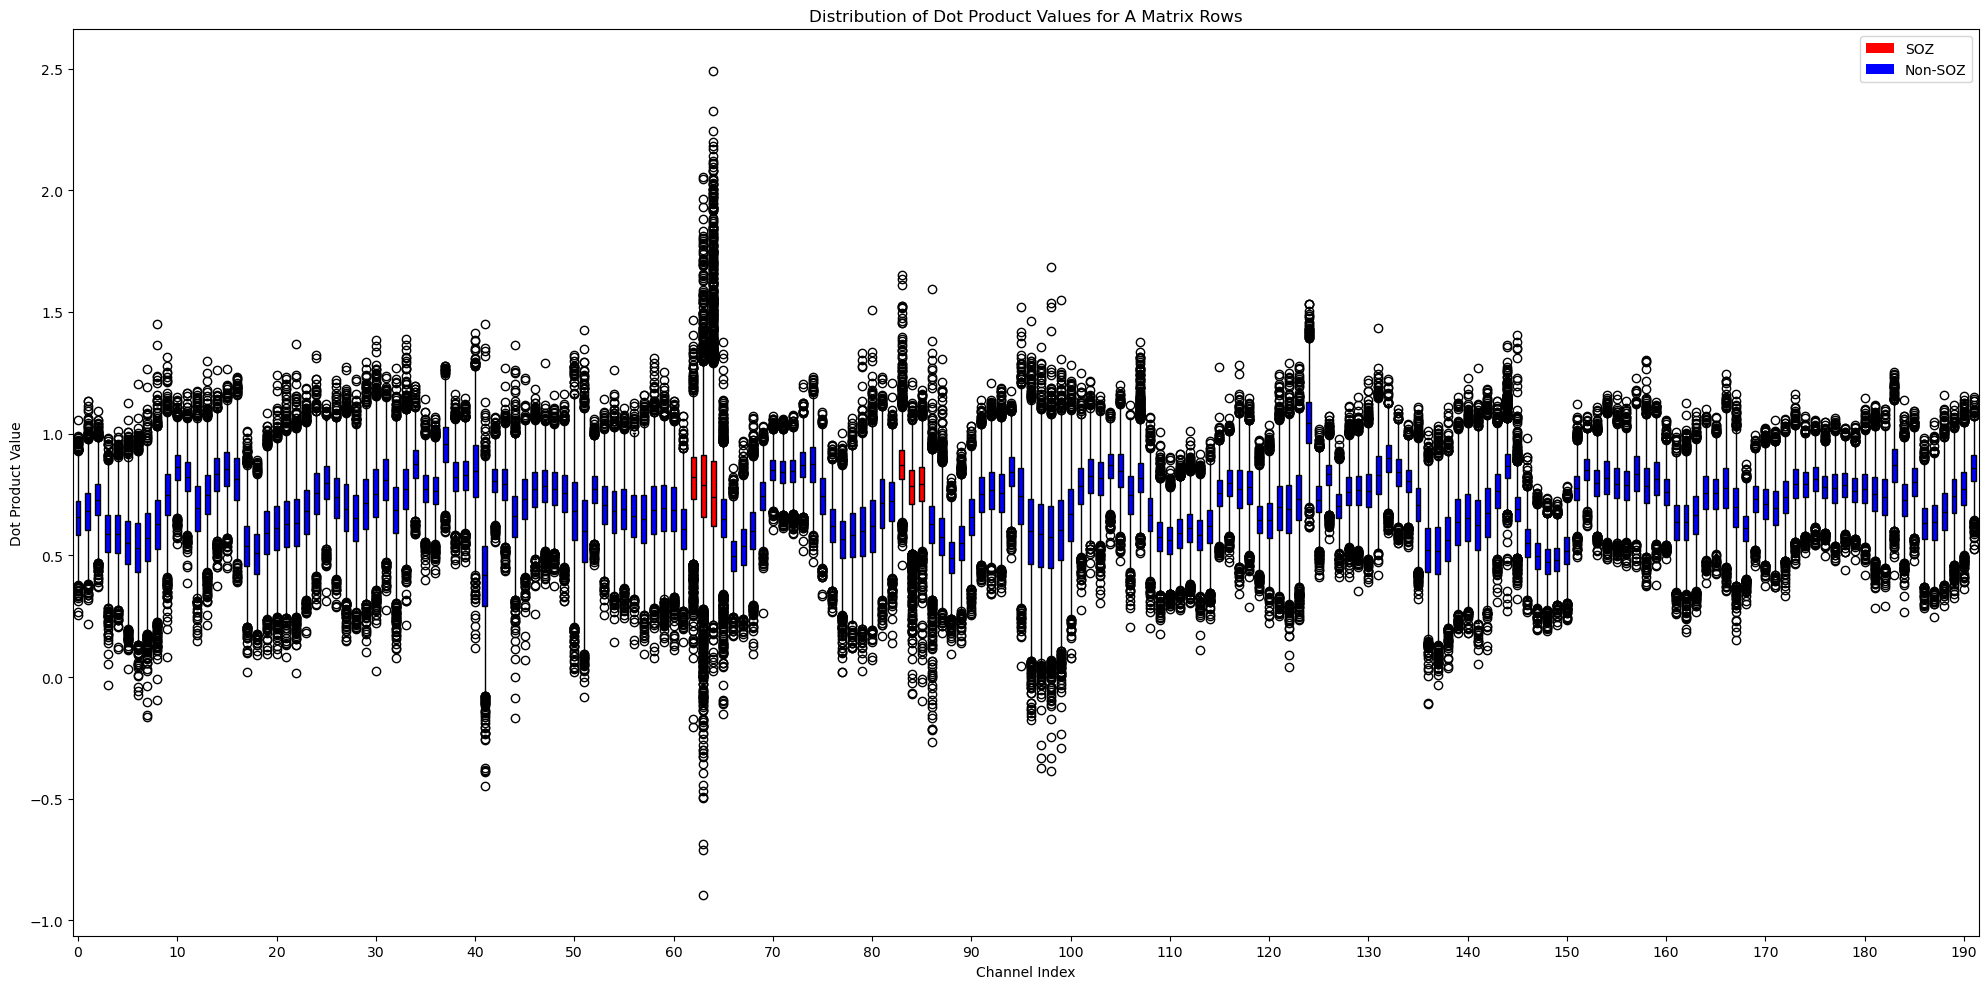

In [8]:

plt.figure(figsize=(20, 10))

# Prepare data for boxplot
box_data = [dots[:, i] for i in range(dots.shape[1])]

# Create the box plot
bp = plt.boxplot(box_data, patch_artist=True, medianprops=dict(color="black"))

# Color the boxes based on SOZ
for patch, is_soz in zip(bp['boxes'], soz):
    patch.set_facecolor('red' if is_soz else 'blue')

plt.title("Distribution of Dot Product Values for A Matrix Rows")
plt.xlabel("Channel Index")
plt.ylabel("Dot Product Value")

# Add a legend
plt.legend([plt.Rectangle((0,0),1,1,fc="red"), plt.Rectangle((0,0),1,1,fc="blue")],
           ['SOZ', 'Non-SOZ'])

# Adjust the x-axis to show all channel indices
plt.xticks(range(1, len(box_data)+1, 10), range(0, len(box_data), 10))

plt.tight_layout()
plt.show()